
# Introduction
* Việc sử dụng [VietOCR](https://github.com/pbcquoc/vietocr) rất phù hợp đối với các data custom như chữ trên bìa sách.
* Model sử dụng : TransformerOCR.

<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>

* Lý do lựa chọn vì model có độ chính xác cao nhất và phù hợp với data phức tạp như chữ trên bìa sách.
* Dataset: gồm 7000 dòng text được cắt ra từ bìa sách và dán nhãn


In [ ]:
# Cài đặt thư viện
! pip install --quiet vietocr==0.3.5

     |████████████████████████████████| 61 kB 8.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 280 kB 58.9 MB/s 
     |████████████████████████████████| 948 kB 69.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


# Import thư viện

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Download dataset

In [ ]:
! gdown https://drive.google.com/uc?id=1YwCoGOjEuFOJ9lhlqAwh3b8-TfokMD2n

Downloading...
From: https://drive.google.com/uc?id=1YwCoGOjEuFOJ9lhlqAwh3b8-TfokMD2n
To: /content/data_line.zip
100% 156M/156M [00:00<00:00, 203MB/s]


In [ ]:
! unzip -qq -o ./data_line.zip

# Train model

1.   Load your config
2.   Train model using your dataset above

## Thay đổi cấu hình

* *data_root*: thư mục lưu tất cả các ảnh
* *train_annotation*: đường dẫn đến file train
* *valid_annotation*: đường dẫn đến file valid
* *print_every*: in train loss sau n bước
* *valid_every*: in validation loss sau n bước
* *iters*: số vòng để train model của bạn
* *export*: thư mục lưu weight để tham chiếu
* *metrics*: số lượng ví dụ lưu trong validation mà bạn muốn để tính loss theo từng phần, với bộ dữ liệu lớn thì việc chia ra này sẽ giúp tiết kiệm thời gian, không gian bộ nhớ hơn.


Load config mặc định ('vgg_transformer')

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
#config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train.txt',
    'valid_annotation':'test.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':8000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 3000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

Bạn có thể thay đổi bất kì tham số ở danh sách bên dưới

In [ ]:
config

{'aug': {'image_aug': True, 'masked_language_model': True},
 'backbone': 'vgg19_bn',
 'cnn': {'hidden': 256,
  'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
  'pretrained': True,
  'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]]},
 'dataloader': {'num_workers': 3, 'pin_memory': True},
 'dataset': {'data_root': './data_line/',
  'image_height': 32,
  'image_max_width': 512,
  'image_min_width': 32,
  'name': 'hw',
  'train_annotation': 'train.txt',
  'valid_annotation': 'test.txt'},
 'device': 'cuda:0',
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'predictor': {'beamsearch': False},
 'pretrain': {'cached': '/tmp/tranformerorc.pth',
  'id_or_url': '13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA',
  'md5': 'af6b46e9295eb1c27ca90bddf8c8729a'},
 'quiet': False,
 'seq_modeling': 'transformer',
 'trainer': {'batch_size': 32,
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'export': './weights/transformerocr.pth',
  'iters': 8000,
  'log': './train.log',
  'metrics': 10000,
  'prin

## Bắt đầu training

Tiền xử lý dữ liệu và áp dụng weight có sẵn giúp tăng nhanh thời gian huấn luyện

In [ ]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Cached Downloading: /tmp/tranformerorc.pth
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmpcptyz945/dl
100%|██████████| 152M/152M [00:00<00:00, 198MB/s]


Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth


Create train_hw: 100%|████████████████████████████████████████| 5599/5599 [00:03<00:00, 1506.75it/s]


Created dataset with 5598 samples


train_hw build cluster: 100%|███████████████████████████████| 5598/5598 [00:00<00:00, 111364.29it/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Create valid_hw: 100%|████████████████████████████████████████| 1401/1401 [00:01<00:00, 1372.92it/s]

Created dataset with 1400 samples



valid_hw build cluster: 100%|████████████████████████████████| 1400/1400 [00:00<00:00, 90198.70it/s]


Visualize dataset để đối chiếu

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


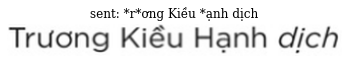

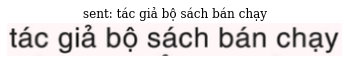

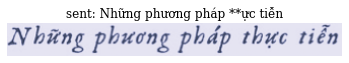

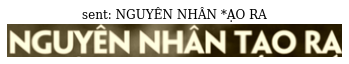

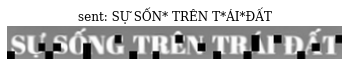

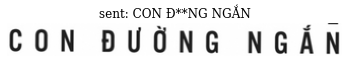

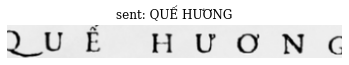

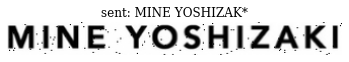

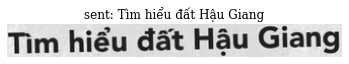

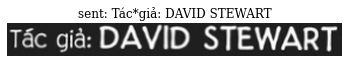

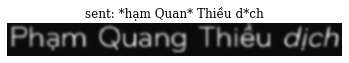

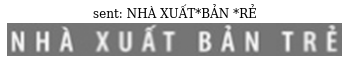

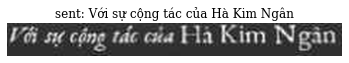

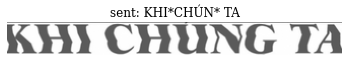

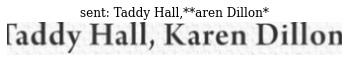

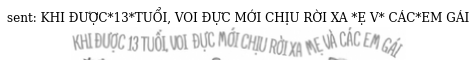

In [ ]:
trainer.visualize_dataset()

Bắt đầu training

In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


iter: 000200 - train loss: 0.697 - lr: 5.43e-05 - load time: 2.40 - gpu time: 119.54
iter: 000400 - train loss: 0.616 - lr: 1.56e-04 - load time: 1.09 - gpu time: 122.40
iter: 000600 - train loss: 0.597 - lr: 2.58e-04 - load time: 1.20 - gpu time: 119.43
iter: 000800 - train loss: 0.585 - lr: 3.00e-04 - load time: 1.57 - gpu time: 120.71
iter: 001000 - train loss: 0.592 - lr: 2.99e-04 - load time: 0.95 - gpu time: 122.28
iter: 001200 - train loss: 0.580 - lr: 2.98e-04 - load time: 1.30 - gpu time: 120.60
iter: 001400 - train loss: 0.579 - lr: 2.95e-04 - load time: 1.95 - gpu time: 121.61
iter: 001600 - train loss: 0.562 - lr: 2.91e-04 - load time: 1.10 - gpu time: 123.86
iter: 001800 - train loss: 0.562 - lr: 2.86e-04 - load time: 1.02 - gpu time: 115.62
iter: 002000 - train loss: 0.560 - lr: 2.80e-04 - load time: 2.14 - gpu time: 121.90
iter: 002200 - train loss: 0.556 - lr: 2.73e-04 - load time: 0.76 - gpu time: 116.03
iter: 002400 - train loss: 0.564 - lr: 2.65e-04 - load time: 1.02

In [ ]:
from google.colab import files
files.download('/content/weights/transformerocr.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visualize prediction


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


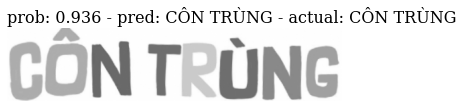

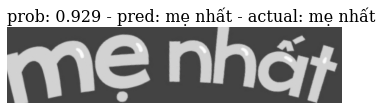

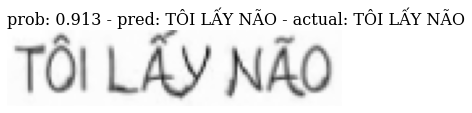

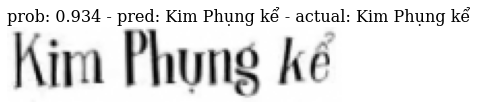

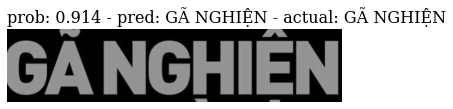

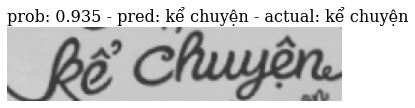

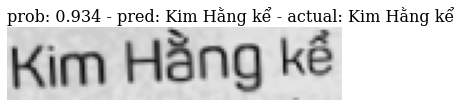

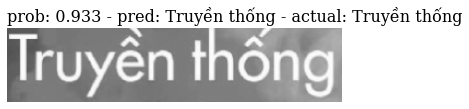

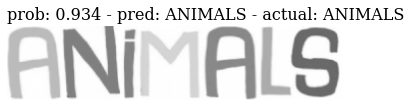

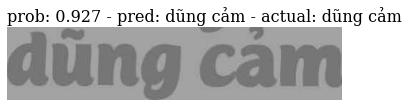

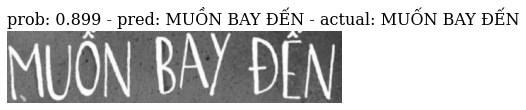

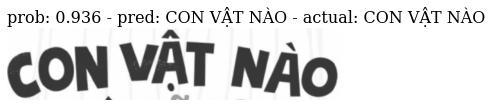

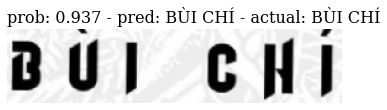

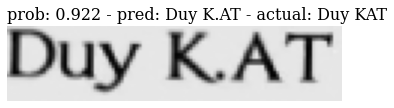

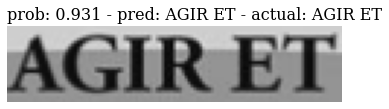

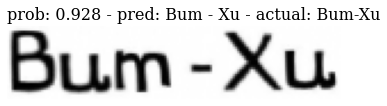

In [ ]:
trainer.visualize_prediction()

Accuracy

In [ ]:
trainer.precision()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


(0.7975543478260869, 0.95942575)

#Demo dự đoán model

In [ ]:
detector = Predictor(config)

Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmp09cwi2hp/dl
100%|██████████| 152M/152M [00:01<00:00, 82.5MB/s]


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
img = '/content/38.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

In [ ]:
import os
from shutil import move

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
move('/content/weights/transformerocr.pth','/content/drive/MyDrive/ML_Dataset/weight_Thai/weight_8000')

'/content/drive/MyDrive/ML_Dataset/weight_Thai/weight_8000/transformerocr.pth'